<a href="https://colab.research.google.com/github/HenintsoaHARINORO/Time-Series-Analysis/blob/main/Stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stationarity

A stationary time series has a constant mean and constant std.

Checking for stationarity

Not stationary => apply transformation(Differenciation)

Differencing is a transformation that calculates the change from one timestep to another.

$ t = 1 , y = y_1 - y_0 $

This transformation is useful to stabilize the mean.
Applying a log function to the series can stabilize its variance.

## Tesing for stationarity: Augmented Dickey-Fuller test (ADF)

It determines if a time series is stationary by testing for the presence of a unit root.

H0 : "unit root is present" => not stationary
H1 : "no unit root" => stationary

p_value < 0.05, we reject the null hypothesis, retain the alternative hypothesis




## Autocorrelation Function
It measures the correlation of the time series with itself.

 The autocorrelation between
 $y_t \space    y_{t−2}  $

 lag = 2

## Defining the random walk

In [1]:
import numpy as np


In [6]:
np.random.seed(42)
steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk = np.cumsum(steps)

Plotting the random walk

In [9]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Scatter(y=random_walk, mode='lines', name='Data', line=dict(color='blue')))
fig.update_layout(title='Random walk',
                  xaxis=dict(title='Timesteps'),
                  yaxis=dict(title='Values '),
                  legend=dict(x=0, y=1))
fig.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


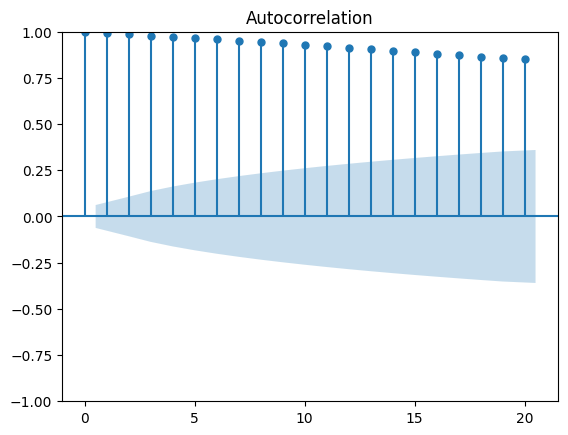

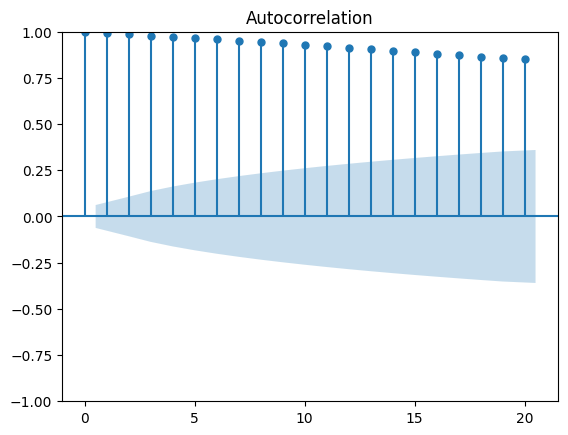

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(random_walk, lags=20)

The shaded area is the confidence interval.  If a point is outside it,  the autocorrelation is significant.

First differenciation

In [22]:
diff_random_walk = np.diff(random_walk, n = 1)

In [24]:
fig_diff = go.Figure()
fig_diff.add_trace(go.Scatter(
    y = diff_random_walk
))
fig.update_layout(title='Diff Random walk',
                  xaxis=dict(title='Timesteps'),
                  yaxis=dict(title='Values '),
                  legend=dict(x=0, y=1))
fig_diff.show()

In [25]:
ADF_result_diff = adfuller(diff_random_walk)
print(f'ADF Statistic: {ADF_result_diff[0]}')
print(f'p-value: {ADF_result_diff[1]}')

ADF Statistic: -31.789310857560594
p-value: 0.0


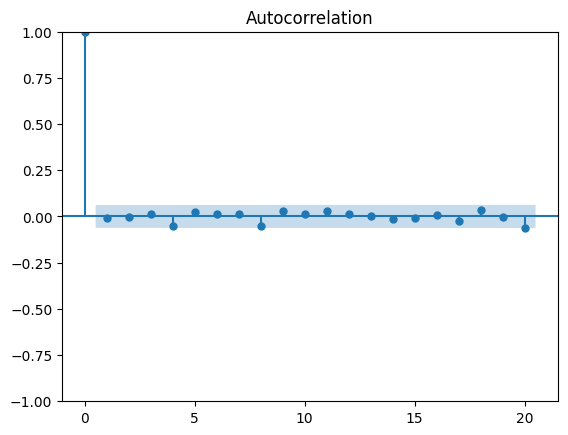

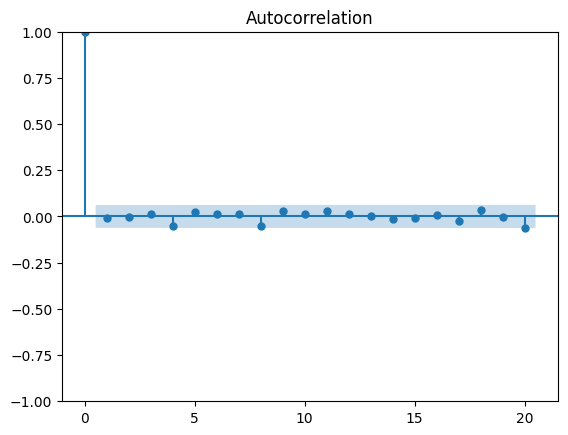

In [27]:
plot_acf(diff_random_walk, lags = 20)